### Homework_5

In [1]:
import numpy as np
import fixed_income_derivatives as fid
import matplotlib.pyplot as plt
from scipy.optimize import minimize, Bounds, NonlinearConstraint
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)

### Problem 1

In [2]:
def fit_vasicek_obj(param,p_star,T):
    r0, a, b, sigma = param
    N = len(p_star)
    p_fit = fid.zcb_price_vasicek(r0,a,b,sigma,T)
    y = 0
    for i in range(0,N):
        y += 1e16*(p_fit[i] - p_star[i])**2
    return y

### Generating the data for the minimization

In [3]:
N = 100
T = np.array([0.1*i for i in range(0,N+1)])
M = len(T)
r0_star, a_star, b_star, sigma_star = 0.025, 2, 0.1, 0.02
p_star = fid.zcb_price_vasicek(r0_star,a_star,b_star,sigma_star,T)

### b) - c)

In [4]:
# print(f"Unconstrained optimization")
param_0 = (0.03, 1.8, 0.12, 0.03)
y = fit_vasicek_obj(param_0,p_star,T)
result = minimize(fit_vasicek_obj,param_0,method = 'nelder-mead',args =
(p_star,T),options={'xatol': 1e-8,'disp': True})
r0_hat, a_hat, b_hat, sigma_hat, fct_value = result.x[0], result.x[1], result.x[2], result.x[3], result.x
print(f"r0_hat: {r0_hat}, a_hat: {a_hat}, b_hat: {b_hat}, sigma_hat: {sigma_hat}, opt: {result.x}")
p_fit = fid.zcb_price_vasicek(r0_hat,a_hat,b_hat,sigma_hat,T)
r_star, r_fit = np.zeros([N]), np.zeros([N])
for i in range(0,N):
    r_star[i] = - np.log(p_star[i+1])/(T[i+1])
    r_fit[i] = - np.log(p_fit[i+1])/(T[i+1])

r0_hat: 0.024991303767373976, a_hat: 1.9987703113758784, b_hat: 0.10003181021657503, sigma_hat: 0.0277855065237083, opt: [0.0249913  1.99877031 0.10003181 0.02778551]


### d)

In [5]:
def fit_vasicek_b_fixed_obj(param,b,p_star,T):
    r0, a, sigma = param
    N = len(p_star)
    p_fit = fid.zcb_price_vasicek(r0,a,b,sigma,T)
    y = 0
    for i in range(0,N):
        y += 1e16*(p_fit[i] - p_star[i])**2
    return y

In [6]:
b = 0.12
param_0 = (0.03, 1.8, 0.03)
y = fit_vasicek_b_fixed_obj(param_0,b,p_star,T)
print(f"y: {y}")


y: 3506157641410731.0


In [11]:
result = minimize(fit_vasicek_b_fixed_obj,param_0,method = 'nelder-mead',args = (b,p_star,T),options={'xatol': 1e-8,'disp': True})
r0_hat, a_hat, sigma_hat, fct_value = result.x[0], result.x[1], result.x[2], result.x
print(f"r0_hat: {r0_hat}, a_hat: {a_hat}, sigma_hat: {sigma_hat}, opt: {result.x}")
p_fit = fid.zcb_price_vasicek(r0_hat,a_hat,b_hat,sigma_hat,T)
r_star, r_fit = np.zeros([N]), np.zeros([N])
for i in range(0,N):
    r_star[i] = - np.log(p_star[i+1])/(T[i+1])
    r_fit[i] = - np.log(p_fit[i+1])/(T[i+1])

r0_hat: 0.020903276275195906, a_hat: 2.3036826156223302, sigma_hat: 0.15260807439171387, opt: [0.02090328 2.30368262 0.15260807]


#### e) - g)

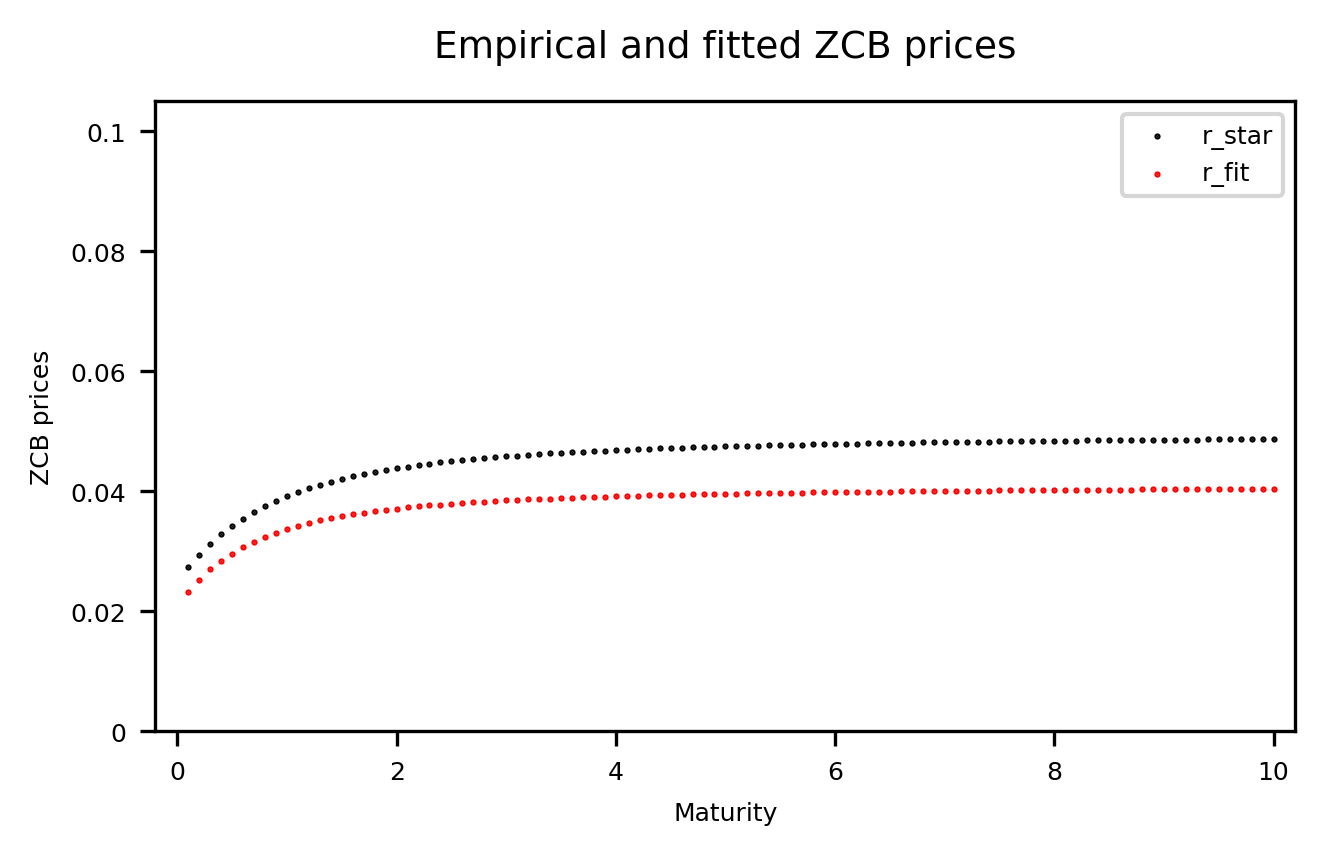

In [15]:
fig = plt.figure(constrained_layout=False, dpi = 300, figsize = (5,3))
fig.suptitle(f"Empirical and fitted ZCB prices", fontsize = 9)
gs = fig.add_gridspec(nrows=1,ncols=1,left=0.12,bottom=0.2,right=0.88,top=0.90,
wspace=0,hspace=0)
ax = fig.add_subplot(gs[0,0])
xticks = [0,2,4,6,8,10]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,fontsize = 6)
ax.set_xlim([xticks[0]-0.2,xticks[-1]+0.2])
plt.xlabel(f"Maturity",fontsize = 6)
ax.set_yticks([0,0.02,0.04,0.06,0.08,0.1])
ax.set_yticklabels([0,0.02,0.04,0.06,0.08,0.1],fontsize = 6)
ax.set_ylim([0,0.105])
ax.set_ylabel(f"ZCB prices",fontsize = 6)
p1 = ax.scatter(T[1:], r_star, s = 1, color = 'black', marker =
".",label="r_star")
p2 = ax.scatter(T[1:], r_fit, s = 1, color = 'red', marker =
".",label="r_fit")
plots = [p1,p2]
labels = [item.get_label() for item in plots]
ax.legend(plots,labels,loc="upper right",fontsize = 6)
plt.show()

In [20]:
#print(f"Bounded optimization")
param_0 = (0.03, 1.8, 0.12, 0.03)
bounds = Bounds([0.,0,0,0],[0.1,1.8,0.14,0.1])
result = minimize(fit_vasicek_obj,param_0,method = 'trust-constr',bounds= bounds,args = (p_star,T),options={'disp': True})
r0_hat, a_hat, b_hat, sigma_hat, fct_value = result.x[0], result.x[1], result.x[2], result.x[3], result.x
print(f"r0_hat: {r0_hat}, a_hat: {a_hat}, b_hat: {b_hat}, sigma_hat:{sigma_hat}, opt: {result.x}"), p_fit = fid.zcb_price_vasicek(r0_hat, a_hat, b_hat, sigma_hat, T)
r_star, r_fit = np.zeros([N]), np.zeros([N])
for i in range(0,N):
    r_star[i] = - np.log(p_star[i+1])/(T[i+1])
    r_fit[i] = - np.log(p_fit[i+1])/(T[i+1])
print(f"optimization with non-linear constraint")
def cons_f(param):
 return [2*param[1]*param[2] - param[3]**2]

 def cons_J(param):
     return [[0,2*param[2],2*param[1],-2*param[3]]]
 def cons_H(param,v):
     return v[0]*np.array([[0,0,0,0],[0,0,2,0],[0,2,0,0],[0,0,0,-2]])
 param_0 = (0.03, 1.8, 0.12, 0.015)
 bounds = Bounds([0,0,0,0],[0.1,3,0.14,0.1]) # bounds =[(0,0.05),(0,3),(0,0.2),(0,0.05)]
 nonlinear_constraint = NonlinearConstraint(cons_f, 0, np.inf, jac=cons_J, hess=cons_H)
 result = minimize(fit_vasicek_obj,param_0,method = 'trust-constr',args = (p_star,T),bounds = bounds,constraints=[nonlinear_constraint],options={'disp': True})
 r0_hat, a_hat, b_hat, sigma_hat, fct_value = result.x[0], result.x[1], result.x[2], result.x[3], result.x
 print(f"r0_hat: {r0_hat}, a_hat: {a_hat}, b_hat: {b_hat}, sigma_hat:{sigma_hat}, opt: {result.x}")
 p_fit = fid.zcb_price_vasicek(r0_hat,a_hat,b_hat,sigma_hat,T)
 r_star, r_fit = np.zeros([N]), np.zeros([N])
 for i in range(0,N):
     r_star[i] = - np.log(p_star[i+1])/(T[i+1])
     r_fit[i] = - np.log(p_fit[i+1])/(T[i+1])

SyntaxError: cannot assign to function call (2091982055.py, line 6)